# About Dataset
## Content
### This is a dataset of Twitter stock prices over a range of 9 years. The stock prices' date ranges from November 2013 to October 2022. The data is in CSV format which is tabular and can be loaded quickly.

# Usage
## The dataset can be used for:

### Time Series Analysis of the stock prices
### Forecasting whether the stock will go into an uptrend or downtrend
### Finding underlying patterns or trends
### Any other application that you can think of. Feel free to discuss!

# Column Description
## There are 7 columns in this dataset.
### Note: The currency is in USD

### Date: The date for which the stock data is considered.
### Open: The stock's opening price on that day.
### High: The stock's highest price on that day.
### Low: The stock's lowest price on that day.
### Close: The stock's closing price on that day. The close price is adjusted for splits.
### Adj Close: Adjusted close price adjusted for splits and dividend and/or capital gain distributions.
### Volume: Volume measures the number of shares traded in a stock or contracts traded in futures or options.


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('twitter-stocks.csv', na_values=['@','#','$','!','&','^'])

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2254,2022-10-21,50.000000,50.750000,49.549999,49.889999,49.889999,51209029.0
2255,2022-10-24,50.709999,51.860001,50.520000,51.520000,51.520000,22987553.0
2256,2022-10-25,52.415001,53.180000,52.200001,52.779999,52.779999,35077848.0
2257,2022-10-26,52.950001,53.500000,52.770000,53.349998,53.349998,28064973.0
2258,2022-10-27,53.910000,54.000000,53.700001,53.700001,53.700001,136345128.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2259 entries, 0 to 2258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2259 non-null   object 
 1   Open       2259 non-null   float64
 2   High       2259 non-null   float64
 3   Low        2259 non-null   float64
 4   Close      2259 non-null   float64
 5   Adj Close  2259 non-null   float64
 6   Volume     2259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 123.7+ KB


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2.259000e+03
mean,36.020286,36.699881,35.339465,36.003625,36.003625,2.175186e+07
std,14.118463,14.372057,13.828724,14.089989,14.089989,1.909988e+07
min,13.950000,14.220000,13.725000,14.010000,14.010000,0.000000e+00
25%,25.550000,26.215001,24.912501,25.410000,25.410000,1.233530e+07
50%,35.419998,36.099998,34.820000,35.490002,35.490002,1.691305e+07
75%,44.205000,45.015000,43.327501,44.135000,44.135000,2.428082e+07
max,78.360001,80.750000,76.050003,77.629997,77.629997,2.692131e+08


In [7]:
df.shape

(2259, 7)

In [8]:
df.isnull().sum().sum()

0

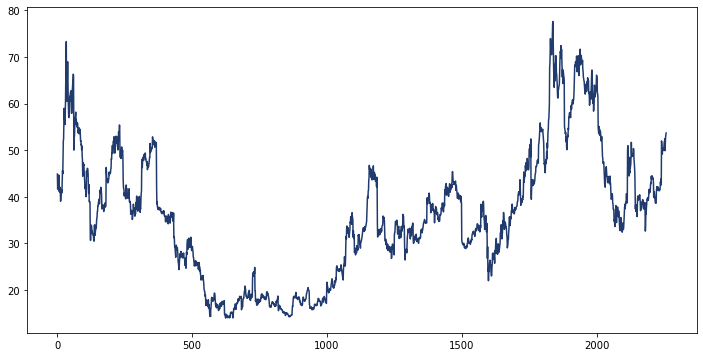

In [9]:
sns.set_palette('cividis')
plt.figure(figsize=(12,6))
plt.plot(df['Close'])

In [10]:
df['Year'] = pd.to_datetime(df['Date']).dt.year


<AxesSubplot:xlabel='Year'>

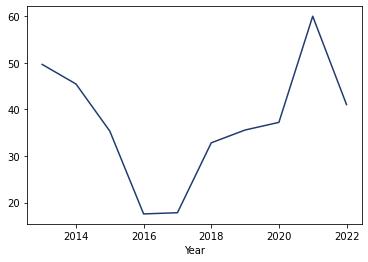

In [11]:
df.groupby('Year')['Close'].mean().plot()

In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0,2013
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0,2013
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0,2013
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0,2013
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0,2013


In [13]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

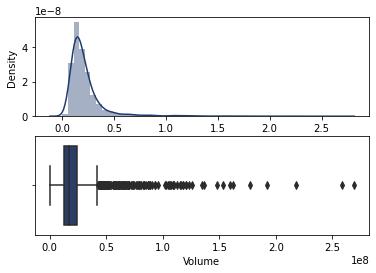

In [14]:
plot(df,'Volume')

In [15]:
df['Volume']=np.where(df['Volume']>=1.5,df['Volume'].median(),df['Volume'])

In [16]:
df.shape

(2259, 8)

In [17]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
Year           int64
dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df['Date']=labelencoder.fit_transform(df['Date'])

In [19]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,0,45.099998,50.090000,44.000000,44.900002,44.900002,16913051.0,2013
1,1,45.930000,46.939999,40.685001,41.650002,41.650002,16913051.0,2013
2,2,40.500000,43.000000,39.400002,42.900002,42.900002,16913051.0,2013
3,3,43.660000,43.779999,41.830002,41.900002,41.900002,16913051.0,2013
4,4,41.029999,42.869999,40.759998,42.599998,42.599998,16913051.0,2013


In [20]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
count,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2259.000000,2.259000e+03,2259.000000
mean,1129.000000,36.020286,36.699881,35.339465,36.003625,36.003625,1.689808e+07,2017.839752
std,652.261451,14.118463,14.372057,13.828724,14.089989,14.089989,5.031328e+05,2.600503
min,0.000000,13.950000,14.220000,13.725000,14.010000,14.010000,0.000000e+00,2013.000000
25%,564.500000,25.550000,26.215001,24.912501,25.410000,25.410000,1.691305e+07,2016.000000
50%,1129.000000,35.419998,36.099998,34.820000,35.490002,35.490002,1.691305e+07,2018.000000
75%,1693.500000,44.205000,45.015000,43.327501,44.135000,44.135000,1.691305e+07,2020.000000
max,2258.000000,78.360001,80.750000,76.050003,77.629997,77.629997,1.691305e+07,2022.000000


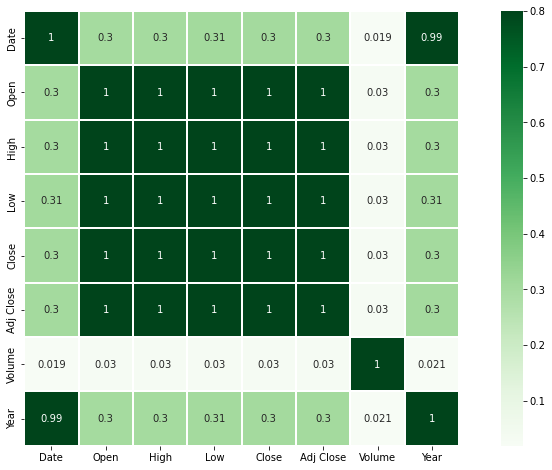

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='Greens', vmax=.8, linewidths=0.01,square=True,annot=True,linecolor="white")
plt.show()

In [22]:
#train test split
from sklearn.model_selection import train_test_split

In [23]:
#x = df.drop('Volume', axis=1)
#y = df['Volume']

LinearRegression Mean Squared Error: 901259681.42
LinearRegression R^2 Score: 0.00


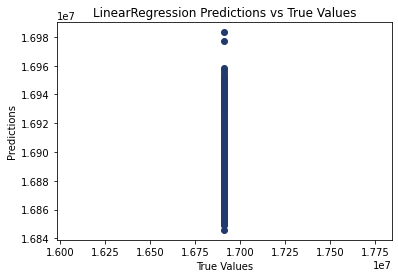

DecisionTreeRegressor Mean Squared Error: 0.00
DecisionTreeRegressor R^2 Score: 1.00


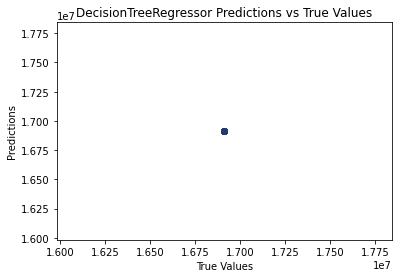

RandomForestRegressor Mean Squared Error: 130938081316.83
RandomForestRegressor R^2 Score: 0.00


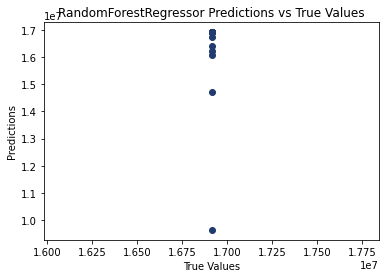

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split data into training and testing sets
X = df.drop('Volume', axis=1)
y = df['Volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models to use
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

# Loop through each model and fit it to the training data
for model in models:
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print(f'{model.__class__.__name__} Mean Squared Error: {mse:.2f}')
    print(f'{model.__class__.__name__} R^2 Score: {r2:.2f}')

    # Plot the accuracy of the model
    plt.scatter(y_test, y_pred)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'{model.__class__.__name__} Predictions vs True Values')
    plt.show()


<AxesSubplot:ylabel='Density'>

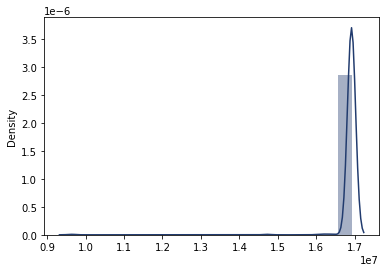

In [25]:
#plotting error
sns.distplot(y_pred)